# Дипломная работа по курсу «Python для анализа данных»

#### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

- для начала загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

- загрузим файл и посмотрим info

In [2]:
df_hr=pd.read_csv('hr.csv')
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- Количество значений 14999, пустые ячейки отсутствуют

Описание столбцов:
- satisfaction_level - уровень удовлетворенности
- last_evaluation - последняя оценка
- number_project - номер проекта
- average_montly_hours - среднемесячное число часов работы
- time_spend_company - время, проведенное в компании
- Work_accident - рабочии аварии
- left - уволен
- promotion_last_5years - движение за последние 5 лет
- sales - отдел
- salary - зарплата

- Посмотрим как визуально выглядят данные

In [3]:
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


- В таблице есть категориальные значения sales и salary

In [4]:
df_hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

- в столбце sales присутствует 10 категорий

In [5]:
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

- в столбце salary присутствует 3 категорий

- Для проверки корреляции оцифруем показатели 'sales' (порядковый номер от наибольшего количества в категории) и 'salary' (low - 1, medium - 2, high - 3)

In [6]:
df_hr.loc[(df_hr.salary == 'low'), 'salary_rang'] = 1
df_hr.loc[(df_hr.salary == 'medium'), 'salary_rang'] = 2
df_hr.loc[(df_hr.salary == 'high'), 'salary_rang'] = 3

df_hr.loc[(df_hr.sales == 'accounting'), 'sales_rang'] = 3
df_hr.loc[(df_hr.sales == 'hr'), 'sales_rang'] = 2
df_hr.loc[(df_hr.sales == 'IT'), 'sales_rang'] = 7
df_hr.loc[(df_hr.sales == 'management'), 'sales_rang'] = 1
df_hr.loc[(df_hr.sales == 'marketing'), 'sales_rang'] = 5
df_hr.loc[(df_hr.sales == 'product_mng'), 'sales_rang'] = 6
df_hr.loc[(df_hr.sales == 'RandD'), 'sales_rang'] = 4
df_hr.loc[(df_hr.sales == 'sales'), 'sales_rang'] = 10
df_hr.loc[(df_hr.sales == 'support'), 'sales_rang'] = 8
df_hr.loc[(df_hr.sales == 'technical'), 'sales_rang'] = 9

df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_rang,sales_rang
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.0,10.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.0,10.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.0,10.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.0,10.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1.0,8.0
14995,0.37,0.48,2,160,3,0,1,0,support,low,1.0,8.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1.0,8.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,1.0,8.0


- Снова проверим info для исключения пыстых значений

In [7]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_rang            14999 non-null  float64
 11  sales_rang             14999 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.4+ MB


#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [8]:
print('Среднее')
df_hr.mean()

Среднее


satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
salary_rang                1.594706
sales_rang                 7.304487
dtype: float64

In [9]:
print('Медиана')
df_hr.median()

Медиана


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
salary_rang                2.00
sales_rang                 8.00
dtype: float64

In [10]:
print('Мода')
df_hr.mode().transpose()

Мода


,0,1
satisfaction_level,0.1,NaN
last_evaluation,0.55,NaN
number_project,4,NaN
average_montly_hours,135,156
time_spend_company,3,NaN
Work_accident,0,NaN
left,0,NaN
promotion_last_5years,0,NaN
sales,sales,NaN
salary,low,NaN


In [11]:
print('Минимум')
df_hr.min()

Минимум


satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
salary_rang                 1
sales_rang                  1
dtype: object

In [12]:
print('Максимум')
df_hr.max()

Максимум


satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
salary_rang                      3
sales_rang                      10
dtype: object

In [13]:
satisfaction_level = df_hr['satisfaction_level']
last_evaluation = df_hr['last_evaluation']
number_project = df_hr['number_project']
average_montly_hours = df_hr['average_montly_hours']
time_spend_company = df_hr['time_spend_company']
Work_accident = df_hr['Work_accident']
left = df_hr['left']
promotion_last_5years = df_hr['promotion_last_5years']

print('Среднее отклонение:')
print('satisfaction_level:    ', statistics.pstdev(satisfaction_level))
print('last_evaluation:       ', statistics.pstdev(last_evaluation))
print('number_project:        ', statistics.pstdev(number_project))
print('average_montly_hours:  ', statistics.pstdev(average_montly_hours))
print('time_spend_company:    ', statistics.pstdev(time_spend_company))
print('Work_accident:         ', statistics.pstdev(Work_accident))
print('left:                  ', statistics.pstdev(left))
print('promotion_last_5years: ', statistics.pstdev(promotion_last_5years))

Среднее отклонение:
satisfaction_level:     0.2486223626820733
last_evaluation:        0.1711634045107436
number_project:         1.2325512654823438
average_montly_hours:   49.94143446256218
time_spend_company:     1.4600875552715114
Work_accident:          0.3517068274513532
left:                   0.42590990072709495
promotion_last_5years:  0.14427665479561314


- Большую часть показателей можно посмотеть так:

In [14]:
df_hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary_rang,14999.0,1.594706,0.637183,1.00,1.00,2.00,2.00,3.0
sales_rang,14999.0,7.304487,2.754845,1.00,5.00,8.00,10.00,10.0


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

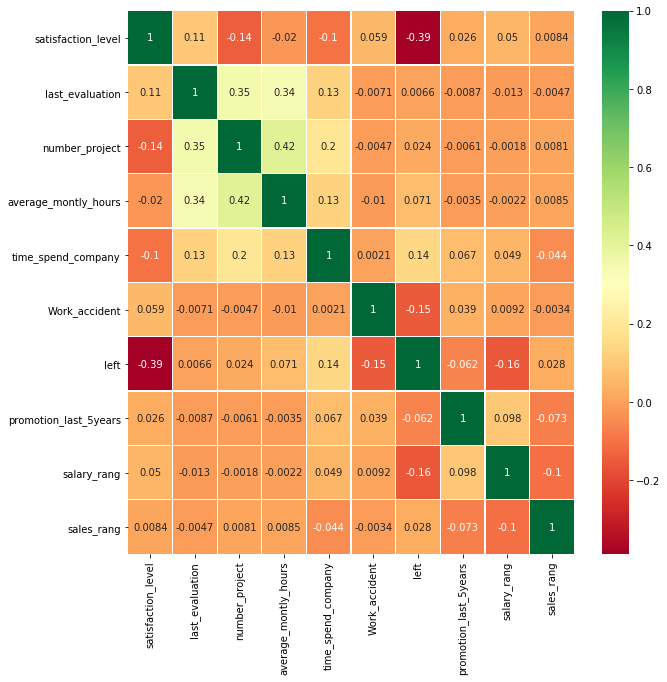

In [15]:
sns.heatmap(df_hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

#### 4. Визуализировать несколько взаимосвязей между переменными

- Посмотрим взаимосвязь между left (увольнения) и satisfaction_level (уровнем удовлетворенности)

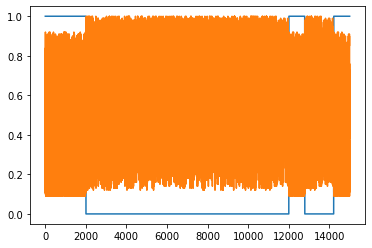

In [16]:
plt.plot(df_hr['left'])
plt.plot(df_hr['satisfaction_level'])

- Между показателями 'left' и 'satisfaction_level' четко видна обратная корреляция, хоть и не очень сильная (-0,39)

- Посмотрим взаимосвязь между average_montly_hours (среднемесячным количеством рабочих часов) и last_evaluation (последняя оценка)

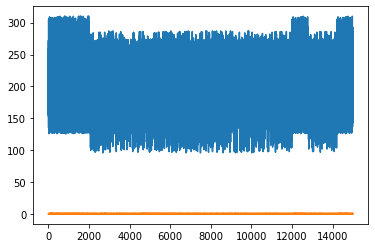

In [17]:
plt.plot(df_hr['average_montly_hours'])
plt.plot(df_hr['last_evaluation'])

- Без нормализации данных корреляцию определить невозможно. Необходимо нормализовать данные

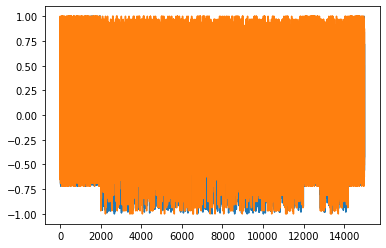

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
average_montly_hours = df_hr['average_montly_hours']
last_evaluation = df_hr['last_evaluation']

average_montly_hours_norm = min_max_scaler.fit_transform(np.array(average_montly_hours).reshape(-1, 1))
last_evaluation_norm = min_max_scaler.fit_transform(np.array(last_evaluation).reshape(-1, 1))

plt.plot(average_montly_hours_norm)
plt.plot(last_evaluation_norm)

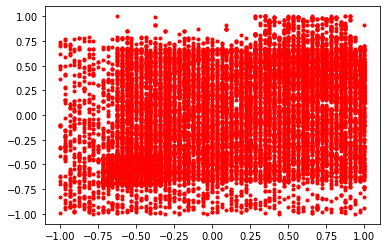

In [19]:
plt.plot(last_evaluation_norm, average_montly_hours_norm, 'r.')
plt.show()

- После нормализации наблюдается корреляция, хоть и не очень сильная (0,34)

- Полезно, кроме матрицы корреляции, посмотреть распределение всех показателей

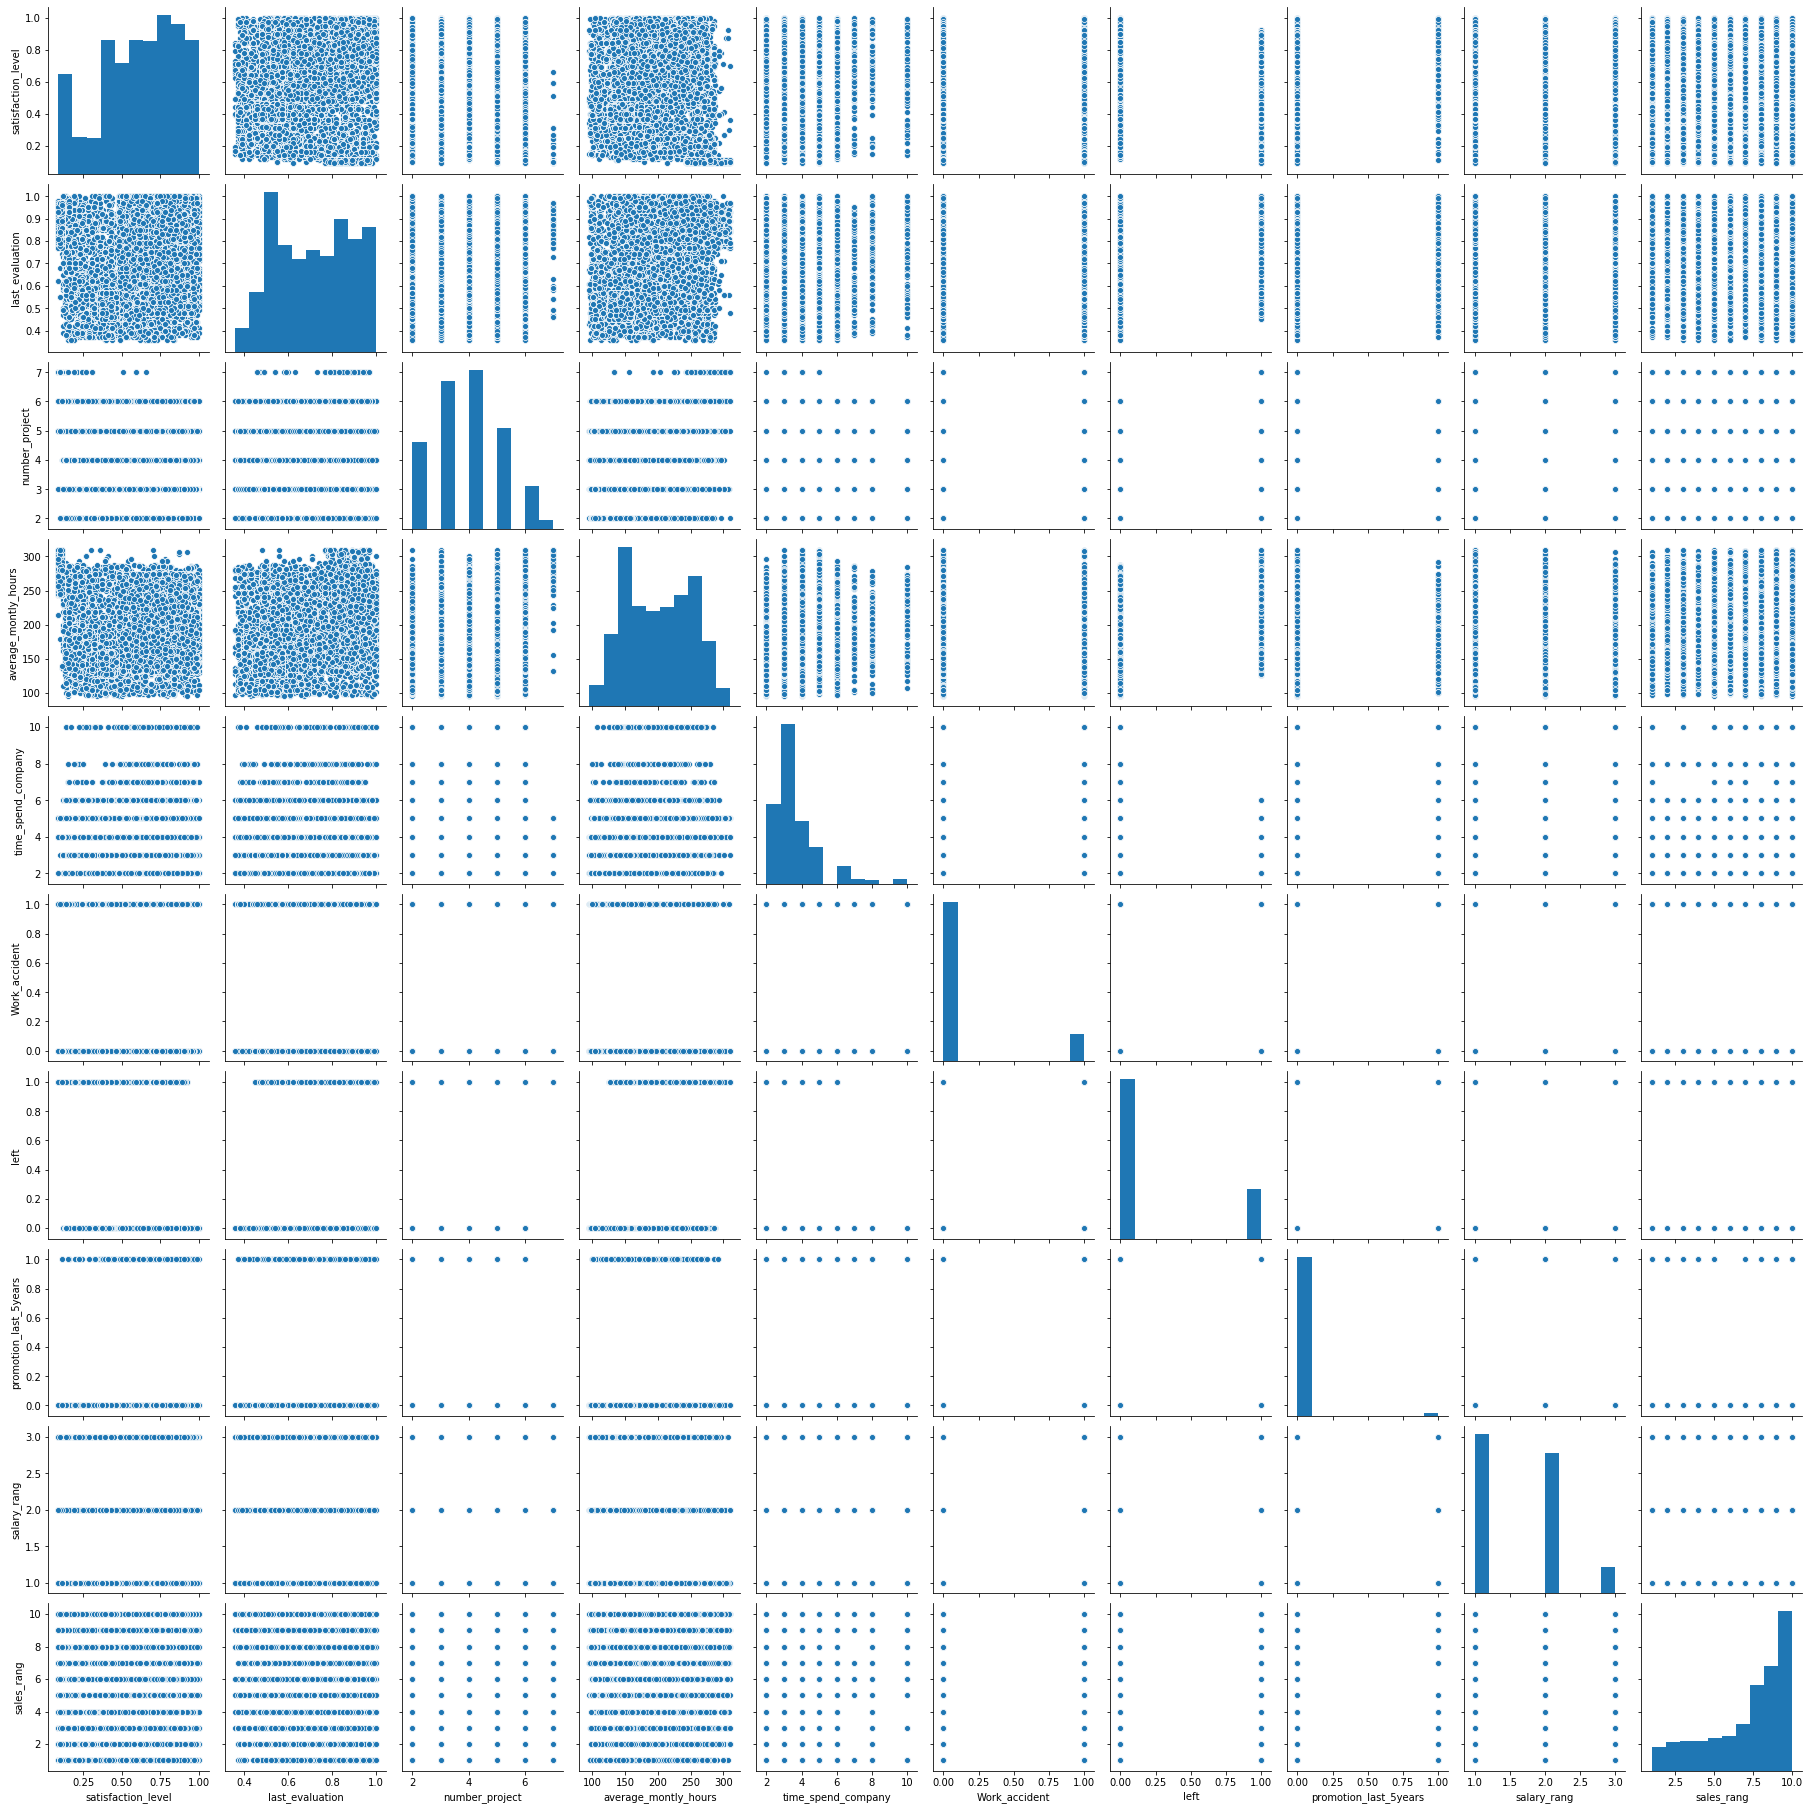

In [20]:
sns.pairplot(df_hr)

#### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

- T-test используют для определения, насколько среднее исследуемой выборки статистически отличается от среднего значения генеральной совокупности. Применяется для проверки гипотезы о равенстве математического ожидания некоторому известному значению. 

- Возьмем выборку sales по параметру "sales" или "satisfaction_level" уровень удовлетворенности

- Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [21]:
sales_satisfaction = df_hr[df_hr['sales'] == 'sales']['satisfaction_level']
stats.ttest_1samp(sales_satisfaction, df_hr['satisfaction_level'].mean())

Ttest_1sampResult(statistic=0.4148106847673951, pvalue=0.6783019956448231)

In [22]:
print('Количество sales: ', len(sales_satisfaction))

Количество sales:  4140


- T-значение = 0.41, p-value = 0.67. 
- Количество sales в выборке = 4140.

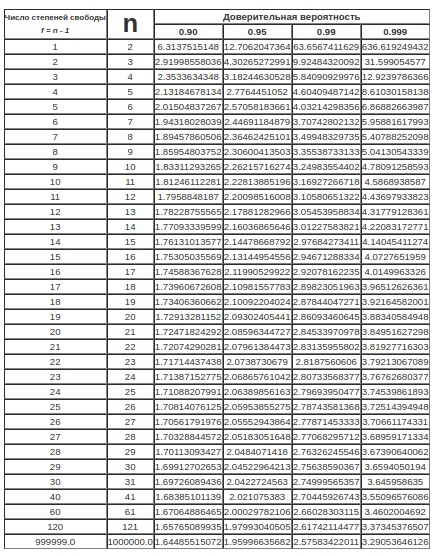

In [23]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

- t-value = 0.4148106847673951, мы сравниваем с табличным значением от 1.95 до 1.97, так как значения 4140 в таблице нет (alpha = 0.05, N=4139). Так как значение t-value не превышает 1.97, то мы принимаем нулевую гипотезу (о том, что средние значения выборок равны). 

- Дополнительно оценим p-value. Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась прилична: p-value = 0.6783019956448231. Намного больше 5%

- p-value равно 0.6783019956448231, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между уровнем удовлетворенности sales и генеральной совокупности в целом. 

- Построим график вероятности выборки и генеральной совокупности, чтобы убедиться, что это действительно так.

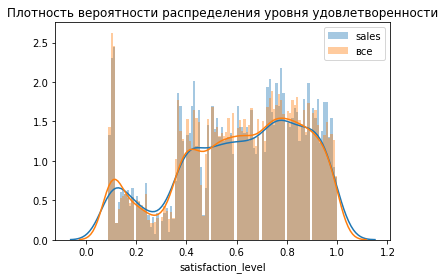

In [24]:
f_trestbps = df_hr[df_hr['sales'] == 'sales']['satisfaction_level']
trestbps = df_hr['satisfaction_level']
sns.distplot(f_trestbps, 100)
sns.distplot(trestbps, 100)
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['sales', 'все'])
plt.show()

#### 6. Рассчитать сколько работников работает в каждом департаменте

- формируем dataframe с неуволенными сотрудниками для определения показатеелей только по действующим работникам

In [25]:
temp_df_hr = df_hr.loc[df_hr.left == 0]

- Определяем количество работников в департаментах

In [26]:
temp_df_hr['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

#### 7. Показать распределение сотрудников по зарплатам

- Определяем количество работников по уровлю зарплат

In [27]:
temp_df_hr['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

- Прям топорный вариант, как я понял задачу (дальше будет второй вариант)

In [28]:
temp_df_hr['sales_salary'] = temp_df_hr.loc[:, str('sales')] + '-' + temp_df_hr.loc[:, str('salary')]
temp_df_hr['sales_salary'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


sales-medium          1469
sales-low             1402
technical-low          994
technical-medium       853
support-medium         784
support-low            757
IT-medium              438
IT-low                 437
product_mng-low        346
RandD-medium           310
RandD-low              309
marketing-medium       308
product_mng-medium     296
marketing-low          276
accounting-low         259
sales-high             255
hr-low                 243
hr-medium              242
accounting-medium      235
management-high        224
management-medium      194
technical-high         176
support-high           133
management-low         121
IT-high                 79
marketing-high          71
accounting-high         69
product_mng-high        62
RandD-high              47
hr-high                 39
Name: sales_salary, dtype: int64

- логичнее сделать сводную таблицу через groupby (получает теже значения, но в читабельном виде)

In [29]:
temp_df_hr.groupby(['sales', 'salary'])['number_project'].aggregate('count').unstack()

salary,high,low,medium
sales,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


#### 9. Сколько сотрудников покинули компанию

- формируем dataframe с уволенными сотрудниками для определения показатеелей только по уволенным работникам

PS. создаю отдельные dataframe так как объем данным не большой. В случае больших объемов информации использовал бы другой способ (например: оставлял бы только необходимые столбцы)

In [30]:
temp_df_hr_left = df_hr.loc[df_hr.left == 1]

- Определяем количество уволенных работников по департаментам

In [31]:
temp_df_hr_left['sales'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Гипотеза 1: большое среднемесячное количество рабочих часов увеличивает вероятность увольнения

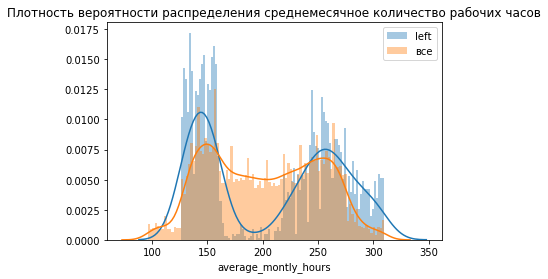

In [32]:
f_trestbps = df_hr[df_hr['left'] == 1]['average_montly_hours']
trestbps = df_hr['average_montly_hours']
sns.distplot(f_trestbps, 100)
sns.distplot(trestbps, 100)
plt.title('Плотность вероятности распределения среднемесячное количество рабочих часов')
plt.legend(['left', 'все'])
plt.show()

- Гипотеза не подтверждается: не только большое значение среднемесячного количества часов увеличивает вероятность увольнения, но и малое количество. При этом среднее значение вероятность сильно снижает.

- Гипотеза 2: Низкий уровень удовлетворенности увеличивает вероятность увольнения

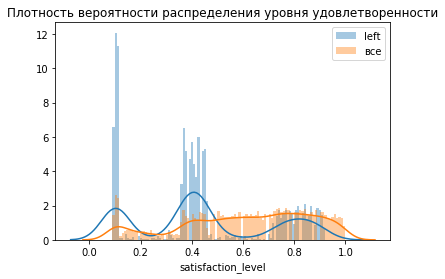

In [33]:
f_trestbps = df_hr[df_hr['left'] == 1]['satisfaction_level']
trestbps = df_hr['satisfaction_level']
sns.distplot(f_trestbps, 100)
sns.distplot(trestbps, 100)
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['left', 'все'])
plt.show()

- Гипотеза 2 подтверждается: низкий уровень удовлетворенности увеличивает вероятность увольнения, а высокая - снижеат

#### 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте